In [20]:
%config InlineBackend.figure_format = 'svg'
import os
from IPython.display import clear_output
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [21]:
# Set seeds for reproducibilty
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    random.seed(seed)

In [22]:
random_seed = 1
seed_random_number(random_seed)

# Import data set:
Inputs = np.load('Data/Inputs.npy')
Labels = np.load('Data/Labels.npy')
Ndata  = len(Labels[:,0])
print('Total data size = ', Ndata)

Total data size =  10000


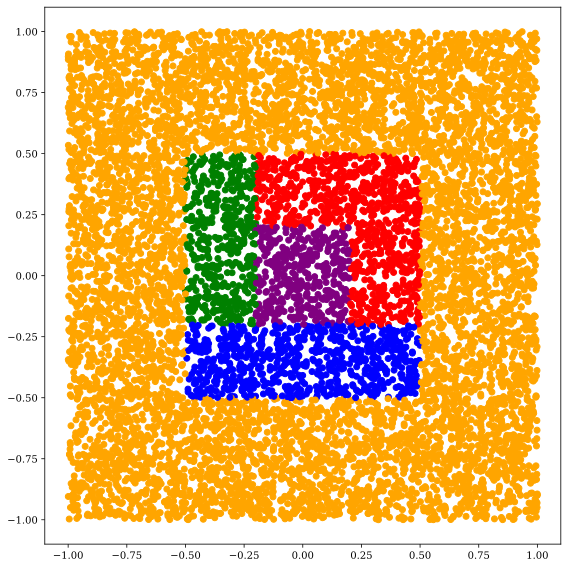

In [23]:
# Visualize data
colors = ['red','green','blue','purple','orange']
clist  = [colors[j] for j in Labels[:,0]]

fig = plt.figure(figsize=(8,8))
plt.scatter(Inputs[:,0], Inputs[:,1], c=clist)
plt.show()

In [24]:
# Segregate data in training and testing data
Ntrain      = 512
Train_Input = Inputs[0:Ntrain,:]
Train_Label = Labels[0:Ntrain,:]
Test_Input  = Inputs[Ntrain::,:]
Test_Label  = Labels[Ntrain::,:]

In [25]:
# Clear keras sessions
keras.backend.clear_session()

# Create network
def create_model(): 
    layer1 = keras.layers.Dense(100,
                                input_shape = (2,),
                                activation=tf.nn.relu,
                                use_bias=True,
                                kernel_initializer='RandomNormal',
                                bias_initializer='RandomNormal')
    layer2 = keras.layers.Dense(100,
                                activation=tf.nn.relu,
                                use_bias=True,
                                kernel_initializer='RandomNormal',
                                bias_initializer='RandomNormal')
    layer3 = keras.layers.Dense(5,
                                activation=tf.nn.softmax,
                                use_bias=True,
                                kernel_initializer='RandomNormal',
                                bias_initializer='RandomNormal')
    model = keras.Sequential([layer1, layer2, layer3])
  
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  
    return model


model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 10,905
Trainable params: 10,905
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Training
model.fit(Train_Input, Train_Label, epochs=500, verbose=2, batch_size=32)

Epoch 1/500
16/16 - 0s - loss: 1.5825 - accuracy: 0.3320 - 135ms/epoch - 8ms/step
Epoch 2/500
16/16 - 0s - loss: 1.5716 - accuracy: 0.7461 - 8ms/epoch - 488us/step
Epoch 3/500
16/16 - 0s - loss: 1.5602 - accuracy: 0.7461 - 8ms/epoch - 480us/step
Epoch 4/500
16/16 - 0s - loss: 1.5479 - accuracy: 0.7461 - 8ms/epoch - 470us/step
Epoch 5/500
16/16 - 0s - loss: 1.5341 - accuracy: 0.7461 - 8ms/epoch - 487us/step
Epoch 6/500
16/16 - 0s - loss: 1.5178 - accuracy: 0.7461 - 8ms/epoch - 476us/step
Epoch 7/500
16/16 - 0s - loss: 1.4990 - accuracy: 0.7461 - 9ms/epoch - 547us/step
Epoch 8/500
16/16 - 0s - loss: 1.4773 - accuracy: 0.7461 - 8ms/epoch - 483us/step
Epoch 9/500
16/16 - 0s - loss: 1.4521 - accuracy: 0.7461 - 8ms/epoch - 495us/step
Epoch 10/500
16/16 - 0s - loss: 1.4234 - accuracy: 0.7461 - 8ms/epoch - 498us/step
Epoch 11/500
16/16 - 0s - loss: 1.3913 - accuracy: 0.7461 - 9ms/epoch - 546us/step
Epoch 12/500
16/16 - 0s - loss: 1.3559 - accuracy: 0.7461 - 8ms/epoch - 526us/step
Epoch 13/500


In [27]:
# Test accuracy of trained model
test_loss, test_acc = model.evaluate(Test_Input, Test_Label)
print('Test accuracy:', test_acc)

297/297 [==============================] - 0s 398us/step - loss: 0.1014 - accuracy: 0.9699
Test accuracy: 0.9698566794395447


297/297 [==============================] - 0s 300us/step


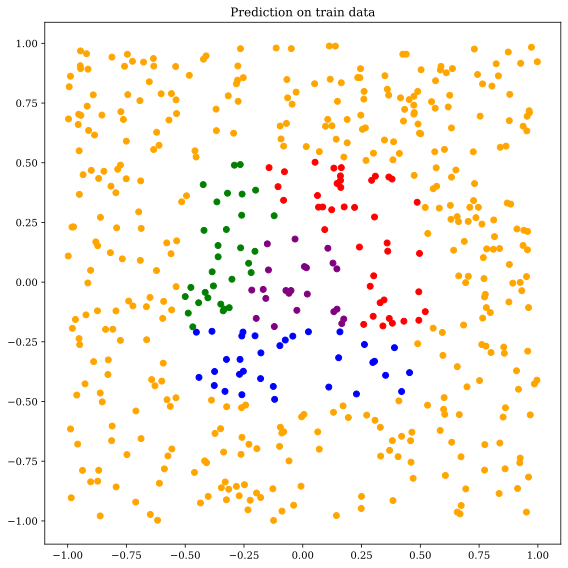

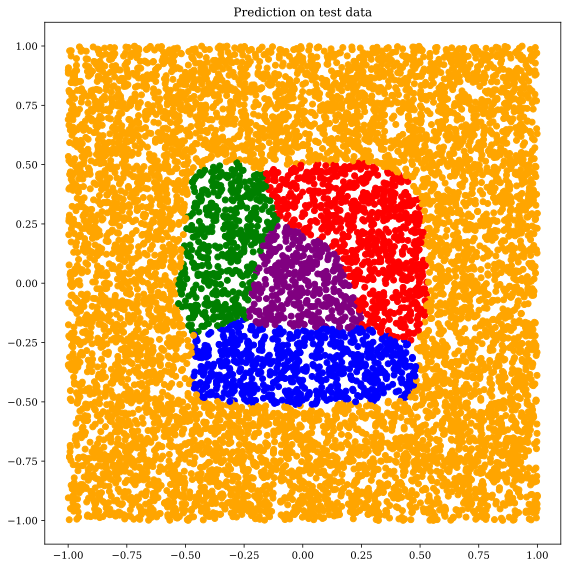

In [28]:
# Make prediction plots
Train_pred = np.argmax(model.predict(Train_Input),axis=1)  
Test_pred  = np.argmax(model.predict(Test_Input),axis=1)

clist  = [colors[j] for j in Train_pred]
fig = plt.figure(figsize=(8,8))
plt.scatter(Train_Input[:,0], Train_Input[:,1], c=clist)
plt.title('Prediction on train data')

clist  = [colors[j] for j in Test_pred]
fig = plt.figure(figsize=(8,8))
plt.scatter(Test_Input[:,0], Test_Input[:,1], c=clist)
plt.title('Prediction on test data')

plt.show()